## Import numpy, pandas, pyplot, and seaborn
set the seaborn style

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## read in data

In [2]:
avo_df = pd.read_csv('avocado.csv')

In [3]:
# remind ourselves of the content of this DF
avo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [27]:
len(avo_df.region.unique())

54

## convert Date column to datetime type and sort by Data

In [5]:
avo_df["Date"] = pd.to_datetime(avo_df["Date"])
avo_df.sort_values("Date", inplace=True)

## Adventure in violinplots
1. Single violinplot
2. Group of violinplots
3. Group of split violinplots

First, create a violinplot showing the distribution of sales of type '4046' conventional avocados for the 'Chicago' region.

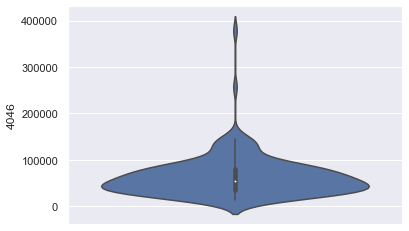

In [6]:
chgo_conv = avo_df.loc[(avo_df["region"] == "Chicago") &
                           (avo_df["type"] == "conventional")]

fig = plt.figure()
ax = sns.violinplot(y="4046", data=chgo_conv)

Next, create a violinplot showing the distribution of the 4046 conventional avocados for each of the following regions:
* Chicago
* Detroit
* Indianapolis
* Nashville

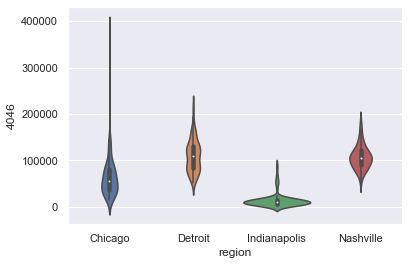

In [60]:
midwest_conv = avo_df.loc[(avo_df["region"].isin(["Chicago", "Detroit", "Indianapolis","Nashville"])) &
                           (avo_df["type"] == "conventional")]

fig = plt.figure()
ax = sns.violinplot(y="4046", x="region", data=midwest_conv)

## internal -- create a stacked version of this df.  

In [8]:
conv_df = avo_df.loc[avo_df["type"] == "conventional"]
conv_df_det_nash = conv_df.loc[conv_df["region"].isin(["Detroit", "Nashville"])]
conv_df_det_nash.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
727,51,2015-01-04,1.01,369694.27,121634.27,117865.11,74062.76,56132.13,46679.86,1060.51,8391.76,conventional,2015,Detroit
1403,51,2015-01-04,1.00,162162.75,113865.83,11083.58,11699.03,25514.31,19681.13,5611.51,221.67,conventional,2015,Nashville
726,50,2015-01-11,1.08,332165.05,108378.69,90104.73,76985.00,56696.63,48639.13,620.82,7436.68,conventional,2015,Detroit
1402,50,2015-01-11,1.07,149832.20,103822.60,9098.86,11665.78,25244.96,22478.92,2766.04,0.00,conventional,2015,Nashville
1401,49,2015-01-18,1.08,143464.64,97216.47,8423.57,12187.72,25636.88,23520.54,2116.34,0.00,conventional,2015,Nashville


In [20]:
df_4046 = conv_df_det_nash[["Date", "region", "4046"]]
df_4046.columns = ["Date", "region", "units"]
df_4046["PLU"] = 4046
df_4046.head()

/Users/caldermyers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,region,units,PLU
727,2015-01-04,Detroit,121634.27,4046
1403,2015-01-04,Nashville,113865.83,4046
726,2015-01-11,Detroit,108378.69,4046
1402,2015-01-11,Nashville,103822.60,4046
1401,2015-01-18,Nashville,97216.47,4046


In [21]:
df_4225 = conv_df_det_nash[["Date", "region", "4225"]]
df_4225.columns = ["Date", "region", "units"]
df_4225["PLU"] = 4225
df_4225.head()

/Users/caldermyers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,region,units,PLU
727,2015-01-04,Detroit,117865.11,4225
1403,2015-01-04,Nashville,11083.58,4225
726,2015-01-11,Detroit,90104.73,4225
1402,2015-01-11,Nashville,9098.86,4225
1401,2015-01-18,Nashville,8423.57,4225


In [22]:
df_4770 = conv_df_det_nash[["Date", "region", "4770"]]
df_4770.columns = ["Date", "region", "units"]
df_4770["PLU"] = 4770
df_4770.head()

/Users/caldermyers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,region,units,PLU
727,2015-01-04,Detroit,74062.76,4770
1403,2015-01-04,Nashville,11699.03,4770
726,2015-01-11,Detroit,76985.00,4770
1402,2015-01-11,Nashville,11665.78,4770
1401,2015-01-18,Nashville,12187.72,4770


In [23]:
stacked_df = pd.concat([df_4046, df_4225, df_4770])

In [24]:
stacked_df.head()

,Date,region,units,PLU
727,2015-01-04,Detroit,121634.27,4046
1403,2015-01-04,Nashville,113865.83,4046
726,2015-01-11,Detroit,108378.69,4046
1402,2015-01-11,Nashville,103822.60,4046
1401,2015-01-18,Nashville,97216.47,4046


In [26]:
stacked_df.to_csv('avocado_stacked')

In [29]:
avo_df_stacked = stacked_df

In [31]:
len(avo_df.columns)

14

In [32]:
avo_df_stacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 727 to 8790
Data columns (total 4 columns):
Date      1014 non-null datetime64[ns]
region    1014 non-null object
units     1014 non-null float64
PLU       1014 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 39.6+ KB


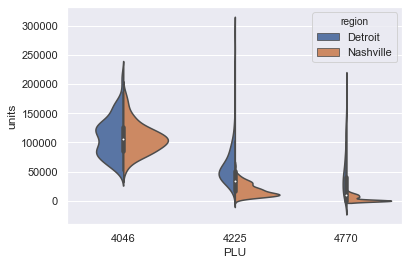

In [37]:
fig = plt.figure()
ax = sns.violinplot(x="PLU", y="units", hue="region", split=True, data=avo_df_stacked)

## Swarmplots

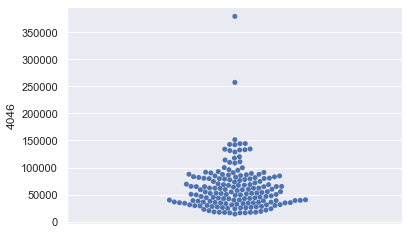

In [41]:
chgo_conv = avo_df.loc[(avo_df["region"] == "Chicago") &
                           (avo_df["type"] == "conventional")]

fig = plt.figure()
ax = sns.swarmplot(y="4046", data=chgo_conv)

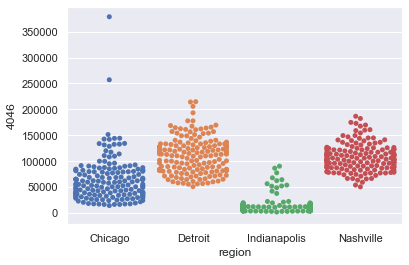

In [42]:
midwest_conv = avo_df.loc[(avo_df["region"].isin(["Chicago", "Detroit", "Indianapolis","Nashville"])) &
                           (avo_df["type"] == "conventional")]

fig = plt.figure()
ax = sns.swarmplot(y="4046", x="region", data=midwest_conv)

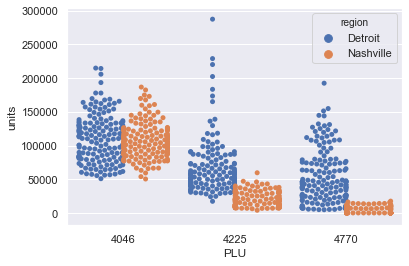

In [43]:
fig = plt.figure()
ax = sns.swarmplot(x="PLU", y="units", hue="region", split=True, data=avo_df_stacked)

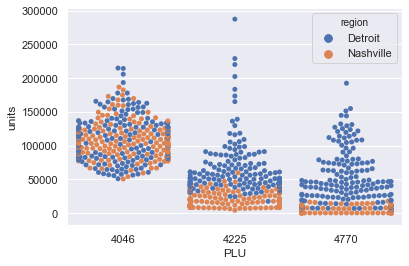

In [44]:
fig = plt.figure()
ax = sns.swarmplot(x="PLU", y="units", hue="region", data=avo_df_stacked)

## Pairplots! 

<Figure size 432x288 with 0 Axes>

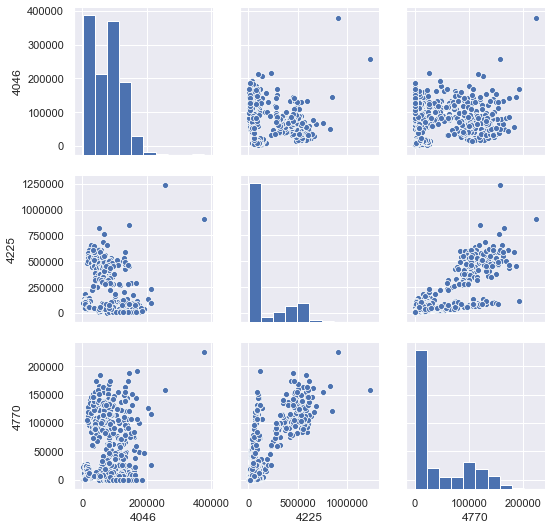

In [52]:
midwest_conv_loos = midwest_conv[["region", "4046", "4225", "4770"]]

fig = plt.figure()
sns.pairplot(midwest_conv_loos)

<Figure size 432x288 with 0 Axes>

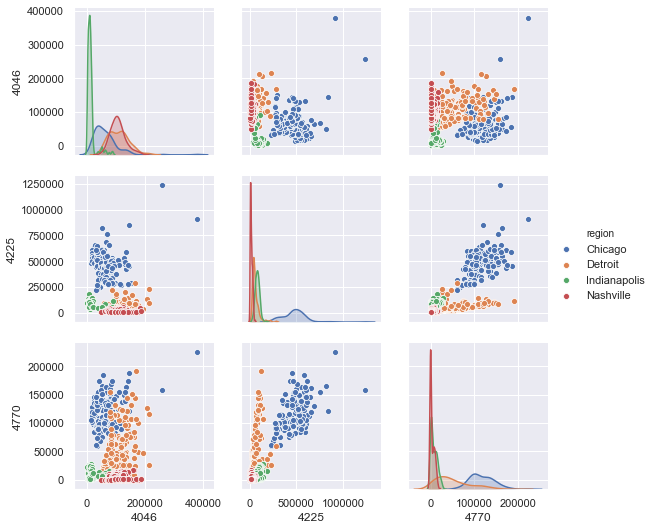

In [53]:
fig = plt.figure()
sns.pairplot(midwest_conv_loos, hue="region")